# Tensorflow

In [3]:
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

define the symbol variable 

In [4]:
x = tf.Variable(1.0)
y = tf.Variable(2.0)

In [6]:
x,y

(<tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>)

define the symbol relationship

In [7]:
z = x+y

In [8]:
z

<tf.Tensor 'add:0' shape=() dtype=float32>

In [9]:
type(z)

tensorflow.python.framework.ops.Tensor

In [10]:
u = tf.log(z)

In [11]:
u

<tf.Tensor 'Log:0' shape=() dtype=float32>

#### Session ( similar with function of Theano)
- Make Session object
- run method 
- close method

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(z))
print(sess.run(u))
sess.close()

3.0
1.0986123


In [16]:
f = x ** 2
fx = tf.gradients(f,[x])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(f))
    print(sess.run(fx))

1.0
[2.0]


Example use of Tensorflow in case of Perceptron

In [19]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx] - 1.0)[:, np.newaxis] # y=1 또는 y=-1. 2차원임을 명시

In [21]:
np.random.seed(0)
w = tf.Variable(1e-3 * np.random.randn(2, 1))
b = tf.Variable(1e-3 * np.random.randn(1)[0])
d = tf.tanh(tf.matmul(X_data, w) + b)

zero = np.zeros(1, dtype=np.float64)[0] # float64 자료형의 0 값 생성 
cost = tf.reduce_sum(tf.maximum(zero, tf.multiply(-y_data, d)))
optimizer = tf.train.GradientDescentOptimizer(1e-7)
train = optimizer.minimize(cost)

sess = tf.Session()

w_summary = tf.summary.histogram("w", w)
b_summary = tf.summary.histogram("b", b)
d_summary = tf.summary.histogram("d", d)
cost_summary = tf.summary.histogram("cost", cost)
#변수 기록용 summary 생성
merged = tf.summary.merge([w_summary, b_summary, d_summary, cost_summary])
#merge 명령으로 summary를 하나로 합친다.
init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter("/home/hskimim/logs", sess.graph)
#해당 경로로 객체(merge object in this case)를 보내면 기록을 실시한다.
for i in range(100):
    sess.run(train)
    summary = sess.run(merged)
    writer.add_summary(summary, i)
    #파일에 쓰기
    if i % 10 == 0:
        print("{:4d}: ".format(i), sess.run(cost))

   0:  0.5494091733308988
  10:  0.45507181478881825
  20:  0.3607278431087564
  30:  0.2663786243415365
  40:  0.17202552496054818
  50:  0.07766991175203047
  60:  0.0009515019028440592
  70:  0.0003168280919044534
  80:  0.0002921058755255818
  90:  0.00029228987473695566


In [22]:
y_pred = sess.run(tf.sign(d))

In [23]:
sess.close()

# Keras

In [112]:
%%time
from sklearn.datasets import load_iris
iris = load_iris()
train_X , train_y = iris.data, iris.target

CPU times: user 0 ns, sys: 3.42 ms, total: 3.42 ms
Wall time: 2.18 ms


In [113]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_X,train_y,test_size=0.2\
                                                    ,shuffle=True,random_state=0)

In [114]:
print(train_X.shape, train_X.dtype)
print(train_y.shape, train_y.dtype)
print(test_X.shape, test_X.dtype)
print(test_y.shape, test_y.dtype)

(120, 4) float64
(120,) int64
(30, 4) float64
(30,) int64


In [120]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [145]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(8,input_dim = 4,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.compile(optimizer=SGD(lr=2),loss='mean_squared_error',metrics=['accuracy'])

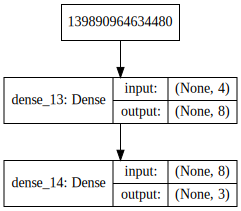

In [146]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [148]:
%%time
hist = model.fit(train_X,train_y,\
                epochs=1000,batch_size=100,\
                validation_data=(test_X,test_y),\
                verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/1000
 - 0s - loss: 0.2583 - acc: 0.0500 - val_loss: 0.2282 - val_acc: 0.1000
Epoch 2/1000
 - 0s - loss: 0.2277 - acc: 0.1667 - val_loss: 0.2506 - val_acc: 0.2000
Epoch 3/1000
 - 0s - loss: 0.2235 - acc: 0.3667 - val_loss: 0.2208 - val_acc: 0.2000
Epoch 4/1000
 - 0s - loss: 0.2173 - acc: 0.3667 - val_loss: 0.2233 - val_acc: 0.2000
Epoch 5/1000
 - 0s - loss: 0.2122 - acc: 0.3667 - val_loss: 0.2169 - val_acc: 0.4000
Epoch 6/1000
 - 0s - loss: 0.2070 - acc: 0.6000 - val_loss: 0.2171 - val_acc: 0.5667
Epoch 7/1000
 - 0s - loss: 0.2023 - acc: 0.6917 - val_loss: 0.2213 - val_acc: 0.5667
Epoch 8/1000
 - 0s - loss: 0.1998 - acc: 0.6667 - val_loss: 0.2218 - val_acc: 0.5000
Epoch 9/1000
 - 0s - loss: 0.1942 - acc: 0.6667 - val_loss: 0.1935 - val_acc: 0.5667
Epoch 10/1000
 - 0s - loss: 0.1857 - acc: 0.6917 - val_loss: 0.1915 - val_acc: 0.5667
Epoch 11/1000
 - 0s - loss: 0.1820 - acc: 0.6917 - val_loss: 0.1846 - val_acc: 0.5667
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.1216 - acc: 0.7000 - val_loss: 0.0515 - val_acc: 1.0000
Epoch 97/1000
 - 0s - loss: 0.0562 - acc: 0.9667 - val_loss: 0.0777 - val_acc: 0.8000
Epoch 98/1000
 - 0s - loss: 0.0681 - acc: 0.8667 - val_loss: 0.1270 - val_acc: 0.6000
Epoch 99/1000
 - 0s - loss: 0.0858 - acc: 0.7833 - val_loss: 0.0997 - val_acc: 0.7000
Epoch 100/1000
 - 0s - loss: 0.0758 - acc: 0.8250 - val_loss: 0.1394 - val_acc: 0.5667
Epoch 101/1000
 - 0s - loss: 0.0973 - acc: 0.7417 - val_loss: 0.1094 - val_acc: 0.7000
Epoch 102/1000
 - 0s - loss: 0.0883 - acc: 0.7750 - val_loss: 0.1963 - val_acc: 0.5667
Epoch 103/1000
 - 0s - loss: 0.1360 - acc: 0.7000 - val_loss: 0.0693 - val_acc: 0.8667
Epoch 104/1000
 - 0s - loss: 0.0597 - acc: 0.9333 - val_loss: 0.1074 - val_acc: 0.7000
Epoch 105/1000
 - 0s - loss: 0.0839 - acc: 0.8083 - val_loss: 0.1296 - val_acc: 0.6000
Epoch 106/1000
 - 0s - loss: 0.0924 - acc: 0.7583 - val_loss: 0.1416 - val_acc: 0.5667
Epoch 107/1000
 - 0s - loss: 0.0908 - acc: 0.77

Epoch 191/1000
 - 0s - loss: 0.0286 - acc: 0.9667 - val_loss: 0.0838 - val_acc: 0.7667
Epoch 192/1000
 - 0s - loss: 0.0557 - acc: 0.8750 - val_loss: 0.0370 - val_acc: 0.9333
Epoch 193/1000
 - 0s - loss: 0.0306 - acc: 0.9583 - val_loss: 0.0216 - val_acc: 0.9667
Epoch 194/1000
 - 0s - loss: 0.0418 - acc: 0.9083 - val_loss: 0.0261 - val_acc: 1.0000
Epoch 195/1000
 - 0s - loss: 0.0296 - acc: 0.9500 - val_loss: 0.0367 - val_acc: 0.9333
Epoch 196/1000
 - 0s - loss: 0.0298 - acc: 0.9667 - val_loss: 0.0193 - val_acc: 0.9667
Epoch 197/1000
 - 0s - loss: 0.0361 - acc: 0.9417 - val_loss: 0.0172 - val_acc: 1.0000
Epoch 198/1000
 - 0s - loss: 0.0280 - acc: 0.9667 - val_loss: 0.0218 - val_acc: 1.0000
Epoch 199/1000
 - 0s - loss: 0.0265 - acc: 0.9667 - val_loss: 0.0374 - val_acc: 0.9000
Epoch 200/1000
 - 0s - loss: 0.0947 - acc: 0.7667 - val_loss: 0.0169 - val_acc: 1.0000
Epoch 201/1000
 - 0s - loss: 0.0264 - acc: 0.9750 - val_loss: 0.0435 - val_acc: 0.9000
Epoch 202/1000
 - 0s - loss: 0.0349 - acc: 

 - 0s - loss: 0.0338 - acc: 0.9500 - val_loss: 0.0434 - val_acc: 0.8667
Epoch 286/1000
 - 0s - loss: 0.0345 - acc: 0.9417 - val_loss: 0.0302 - val_acc: 0.9333
Epoch 287/1000
 - 0s - loss: 0.0328 - acc: 0.9500 - val_loss: 0.1180 - val_acc: 0.7333
Epoch 288/1000
 - 0s - loss: 0.0668 - acc: 0.8500 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 289/1000
 - 0s - loss: 0.0217 - acc: 0.9667 - val_loss: 0.0117 - val_acc: 0.9667
Epoch 290/1000
 - 0s - loss: 0.0242 - acc: 0.9583 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 291/1000
 - 0s - loss: 0.0201 - acc: 0.9750 - val_loss: 0.0275 - val_acc: 0.9667
Epoch 292/1000
 - 0s - loss: 0.0238 - acc: 0.9583 - val_loss: 0.0195 - val_acc: 0.9667
Epoch 293/1000
 - 0s - loss: 0.0530 - acc: 0.8917 - val_loss: 0.0265 - val_acc: 0.9667
Epoch 294/1000
 - 0s - loss: 0.0645 - acc: 0.8667 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 295/1000
 - 0s - loss: 0.0219 - acc: 0.9583 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 296/1000
 - 0s - loss: 0.0213 - acc: 0.9750 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0185 - acc: 0.9750 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 381/1000
 - 0s - loss: 0.0180 - acc: 0.9750 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 382/1000
 - 0s - loss: 0.0194 - acc: 0.9583 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 383/1000
 - 0s - loss: 0.0179 - acc: 0.9667 - val_loss: 0.0138 - val_acc: 0.9667
Epoch 384/1000
 - 0s - loss: 0.0309 - acc: 0.9250 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 385/1000
 - 0s - loss: 0.0174 - acc: 0.9750 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 386/1000
 - 0s - loss: 0.0200 - acc: 0.9583 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 387/1000
 - 0s - loss: 0.0174 - acc: 0.9750 - val_loss: 0.0146 - val_acc: 1.0000
Epoch 388/1000
 - 0s - loss: 0.0208 - acc: 0.9667 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 389/1000
 - 0s - loss: 0.0177 - acc: 0.9667 - val_loss: 0.0208 - val_acc: 0.9667
Epoch 390/1000
 - 0s - loss: 0.0488 - acc: 0.9167 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 391/1000
 - 0s - loss: 0.0184 - acc: 

 - 0s - loss: 0.0224 - acc: 0.9583 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 475/1000
 - 0s - loss: 0.0191 - acc: 0.9583 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 476/1000
 - 0s - loss: 0.0162 - acc: 0.9750 - val_loss: 0.0136 - val_acc: 0.9667
Epoch 477/1000
 - 0s - loss: 0.0194 - acc: 0.9583 - val_loss: 0.0106 - val_acc: 0.9667
Epoch 478/1000
 - 0s - loss: 0.0228 - acc: 0.9500 - val_loss: 0.0115 - val_acc: 0.9667
Epoch 479/1000
 - 0s - loss: 0.0240 - acc: 0.9333 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 480/1000
 - 0s - loss: 0.0162 - acc: 0.9750 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 481/1000
 - 0s - loss: 0.0172 - acc: 0.9667 - val_loss: 0.0122 - val_acc: 0.9667
Epoch 482/1000
 - 0s - loss: 0.0254 - acc: 0.9417 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 483/1000
 - 0s - loss: 0.0161 - acc: 0.9750 - val_loss: 0.0158 - val_acc: 0.9667
Epoch 484/1000
 - 0s - loss: 0.0473 - acc: 0.8917 - val_loss: 0.0141 - val_acc: 0.9667
Epoch 485/1000
 - 0s - loss: 0.0358 - acc: 0.9250 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0932 - acc: 0.8333 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 570/1000
 - 0s - loss: 0.0199 - acc: 0.9583 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 571/1000
 - 0s - loss: 0.0153 - acc: 0.9750 - val_loss: 0.0103 - val_acc: 0.9667
Epoch 572/1000
 - 0s - loss: 0.0207 - acc: 0.9500 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 573/1000
 - 0s - loss: 0.0216 - acc: 0.9583 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 574/1000
 - 0s - loss: 0.0183 - acc: 0.9583 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 575/1000
 - 0s - loss: 0.0152 - acc: 0.9750 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 576/1000
 - 0s - loss: 0.0160 - acc: 0.9750 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 577/1000
 - 0s - loss: 0.0157 - acc: 0.9833 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 578/1000
 - 0s - loss: 0.0152 - acc: 0.9750 - val_loss: 0.0095 - val_acc: 0.9667
Epoch 579/1000
 - 0s - loss: 0.0219 - acc: 0.9417 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 580/1000
 - 0s - loss: 0.0159 - acc: 

 - 0s - loss: 0.0158 - acc: 0.9833 - val_loss: 0.0075 - val_acc: 1.0000
Epoch 664/1000
 - 0s - loss: 0.0188 - acc: 0.9583 - val_loss: 0.0119 - val_acc: 0.9667
Epoch 665/1000
 - 0s - loss: 0.0215 - acc: 0.9583 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 666/1000
 - 0s - loss: 0.0147 - acc: 0.9750 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 667/1000
 - 0s - loss: 0.0156 - acc: 0.9750 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 668/1000
 - 0s - loss: 0.0147 - acc: 0.9750 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 669/1000
 - 0s - loss: 0.0163 - acc: 0.9667 - val_loss: 0.0101 - val_acc: 0.9667
Epoch 670/1000
 - 0s - loss: 0.0200 - acc: 0.9500 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 671/1000
 - 0s - loss: 0.0152 - acc: 0.9750 - val_loss: 0.0194 - val_acc: 0.9667
Epoch 672/1000
 - 0s - loss: 0.0539 - acc: 0.9000 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 673/1000
 - 0s - loss: 0.0183 - acc: 0.9750 - val_loss: 0.0119 - val_acc: 0.9667
Epoch 674/1000
 - 0s - loss: 0.0298 - acc: 0.9333 - val_lo

Epoch 758/1000
 - 0s - loss: 0.0201 - acc: 0.9583 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 759/1000
 - 0s - loss: 0.0147 - acc: 0.9667 - val_loss: 0.0127 - val_acc: 0.9667
Epoch 760/1000
 - 0s - loss: 0.0202 - acc: 0.9583 - val_loss: 0.0095 - val_acc: 0.9667
Epoch 761/1000
 - 0s - loss: 0.0265 - acc: 0.9333 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 762/1000
 - 0s - loss: 0.0161 - acc: 0.9833 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 763/1000
 - 0s - loss: 0.0142 - acc: 0.9750 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 764/1000
 - 0s - loss: 0.0162 - acc: 0.9667 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 765/1000
 - 0s - loss: 0.0143 - acc: 0.9750 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 766/1000
 - 0s - loss: 0.0189 - acc: 0.9667 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 767/1000
 - 0s - loss: 0.0142 - acc: 0.9750 - val_loss: 0.0070 - val_acc: 0.9667
Epoch 768/1000
 - 0s - loss: 0.0200 - acc: 0.9667 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 769/1000
 - 0s - loss: 0.0143 - acc: 

Epoch 853/1000
 - 0s - loss: 0.0233 - acc: 0.9583 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 854/1000
 - 0s - loss: 0.0138 - acc: 0.9750 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 855/1000
 - 0s - loss: 0.0171 - acc: 0.9667 - val_loss: 0.0083 - val_acc: 0.9667
Epoch 856/1000
 - 0s - loss: 0.0227 - acc: 0.9500 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 857/1000
 - 0s - loss: 0.0144 - acc: 0.9750 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 858/1000
 - 0s - loss: 0.0141 - acc: 0.9667 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 859/1000
 - 0s - loss: 0.0141 - acc: 0.9750 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 860/1000
 - 0s - loss: 0.0194 - acc: 0.9583 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 861/1000
 - 0s - loss: 0.0152 - acc: 0.9667 - val_loss: 0.0280 - val_acc: 0.9667
Epoch 862/1000
 - 0s - loss: 0.0722 - acc: 0.8583 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 863/1000
 - 0s - loss: 0.0145 - acc: 0.9917 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 864/1000
 - 0s - loss: 0.0138 - acc: 

 - 0s - loss: 0.0171 - acc: 0.9583 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 948/1000
 - 0s - loss: 0.0139 - acc: 0.9750 - val_loss: 0.0146 - val_acc: 0.9667
Epoch 949/1000
 - 0s - loss: 0.0373 - acc: 0.9167 - val_loss: 0.0072 - val_acc: 0.9667
Epoch 950/1000
 - 0s - loss: 0.0185 - acc: 0.9667 - val_loss: 0.0166 - val_acc: 0.9667
Epoch 951/1000
 - 0s - loss: 0.0329 - acc: 0.9333 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 952/1000
 - 0s - loss: 0.0183 - acc: 0.9667 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 953/1000
 - 0s - loss: 0.0150 - acc: 0.9667 - val_loss: 0.0093 - val_acc: 0.9667
Epoch 954/1000
 - 0s - loss: 0.0177 - acc: 0.9500 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 955/1000
 - 0s - loss: 0.0163 - acc: 0.9750 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 956/1000
 - 0s - loss: 0.0135 - acc: 0.9750 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 957/1000
 - 0s - loss: 0.0143 - acc: 0.9667 - val_loss: 0.0104 - val_acc: 0.9667
Epoch 958/1000
 - 0s - loss: 0.0222 - acc: 0.9417 - val_lo

### Let's understand about difference between 'epoch' and 'batch_size' and 'iteration'
- Let's link this problem with 'Gradient Descent'
    - It is an iterative optimaization algorithm used in ML to find the best results.
- Epochs
    - One Epoch is when an entire dataset is passed forward and backward through the neural network only ONCE
- why we use more than one Epoch?
    - I know it doesn't make sense in the starting that the pasing the entire datset through a neural network is not enought and we need to pass the full daset multiple times to the same neural network. But keep in mind that we are using a limited dataset and to optimise the learning and the graph we are using Gradient Descent which is an iterative process. So, updating the weights with single pass or one epoch is not enough.
- Bath Size
    - Total number of training examples present in a single batch.
    - As I said, you can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.
- Iteration
    - Iterations is the number of batches needed to complete one epoch.
- `We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.`

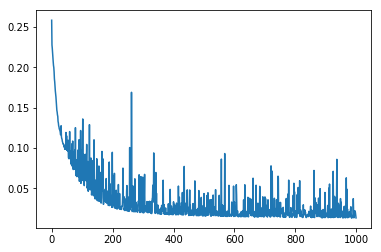

In [149]:
import matplotlib.pylab as plt

plt.plot(hist.history['loss'])
plt.show()

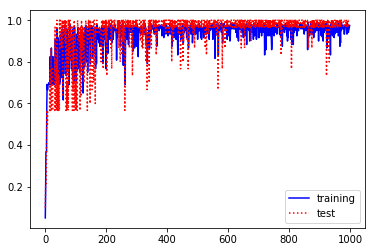

In [150]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [151]:
np.max(hist.history['acc'])

0.9916666746139526

In [152]:
np.max(hist.history['val_acc'])

1.0

In [153]:
predictions = model.predict(train_X)

In [154]:
y_pred = lb.inverse_transform(np.round(predictions))

In [155]:
y_true = lb.inverse_transform(train_y)

In [157]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_true,y_pred)

array([[39,  0,  0],
       [ 0, 32,  5],
       [ 0,  0, 44]])

In [159]:
accuracy_score(y_true,y_pred)

0.9583333333333334